### Week3

https://discourse.onlinedegree.iitm.ac.in/t/lec-3-4-overfitting/28384

-- @ShreyanshBardia

In [1]:
import matplotlib.pyplot as plt
import itertools
import functools
import numpy as np

def polynomialtransformation(x,degree):
    x=np.array(x) if x.ndim!=1 else np.array(x).reshape(-1,1)
    x_t=x.T
    features=[np.ones(x.shape[0])]
    for d in range(1,degree+1):
      f=itertools.combinations_with_replacement(x_t,d)
      for it in f:  
        features.append(functools.reduce(lambda x,y:x*y,it))
    return np.array(features).T
def gd(x,y,lr,num_of_iter):
  w=np.zeros(x.shape[-1])
  for _ in range(num_of_iter):
    w=w-lr*x.T@(x@w-y)
  return w
def fit(x,y):
  return np.linalg.pinv(x) @ y
def visualize(x,y,w):
  plt.scatter(x,y)
  x_ax=np.linspace(0,1,100)
  plt.plot(x_ax,np.sin(2*np.pi*x_ax),label="sin()")
  plt.plot(x_ax,polynomialtransformation(x_ax,9)@w,label="fit")
  plt.legend()
  plt.show()

x=np.linspace(0,1,10)
y=np.sin(2*np.pi*x)+np.random.normal(scale=0.2,size=10)

w=gd(polynomialtransformation(x,9),y,0.01,100000)
visualize(x,y,w)

<Figure size 640x480 with 1 Axes>

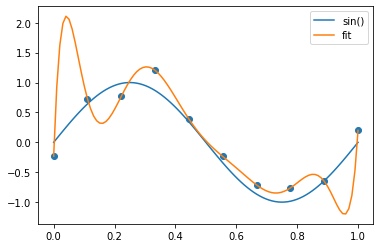

In [2]:
w=fit(polynomialtransformation(x,9),y)
visualize(x,y,w)

https://discourse.onlinedegree.iitm.ac.in/t/doubt-in-l-3-4-polynomial-regression-an-example/28435/3

-- @rohitkumar @Anand

(0.0, 1.0)

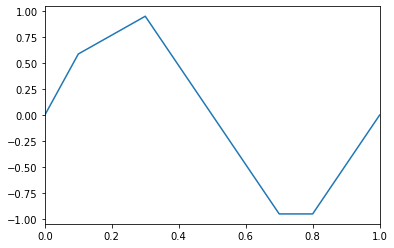

In [3]:
import numpy as np
from matplotlib import pyplot as plt
x = np.array(sorted([0.7,0.3,0,0.1,0.8,1]))
#x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)
plt.plot(x, y)
plt.xlim(0, 1)

### Week4

https://discourse.onlinedegree.iitm.ac.in/t/week-4-lec-4-4-time-6-50/28700

-- @mukeshonlines

In [4]:
def encode(class_indices: np.ndarray):
  # get the max value from the given array
  maxval =  np.max(class_indices)+1
  
  encode_list = []
  for i in class_indices:
    # create the list with 0 with max val like if max is 4  [0,0,0,0]
    zero_list = [0] * maxval
    # update the index value to 1 for exmaple if value is 2  [0,0,2,0] and if 1  [0,1,0,0]
    zero_list[i]=1
    # append the list to encode list
    encode_list.append(zero_list)
  return np.array(encode_list)  

class_indices = np.array([1,0,1,2,7])
encode(np.array(class_indices))

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

Below code is equivalent to the above.

In [5]:
import numpy as np
class_indices = np.array([1,0,1,2,7]) #using same example that mukesh used
np.eye(np.max(class_indices) + 1)[class_indices]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

https://discourse.onlinedegree.iitm.ac.in/t/python-meshgrid-function/28931/2

-- @anurag_k

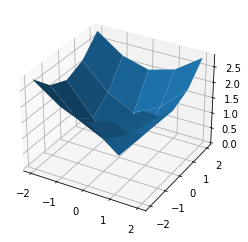

In [6]:
x = np.linspace(-2,2,5)
y = np.linspace(-2,2,5)
gx, gy = np.meshgrid(x, y)

fxy = np.sqrt(gx**2+gy**2)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(gx, gy, fxy)

https://discourse.onlinedegree.iitm.ac.in/t/least-square-clasification/28936/2

-- @ShreyaY

[0.5693277310924385,
 0.5658263305322142,
 0.5623249299719898,
 0.5588235294117655,
 0.5553221288515412,
 0.5518207282913168,
 0.5483193277310925,
 0.5448179271708682,
 0.5413165266106439,
 0.5378151260504195]

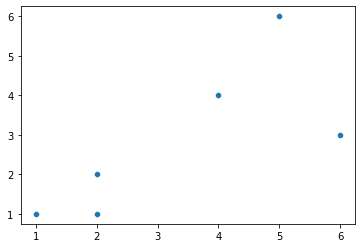

In [7]:
import seaborn as sns

x1 = np.array((1,2,2,4,5,6,))
x2 = np.array((1,2,1,4,6,3))
y = np.array(((0,1),(0,1),(0,1),(1,0),(1,0),(1,0)))

x = np.concatenate((x1, x2))
sns.scatterplot(data=x, x=x1, y=x2)

#Adding the dummy feature x0, with x1 and x2 as 3 separate columns of input matrix.
x = np.column_stack((np.ones(x1.shape[0]), x1, x2))

w = np.linalg.solve(x.T @ x, x.T @ y) #Solving for the weight vector

#Line that classifies the two classes x1 and x2
def create_line(w):
  x1 = np.linspace(0,5,10).reshape(-1,1)
  x2 = np.linspace(10,0,10).reshape(-1,1)
  x_ = np.column_stack((np.ones(x1.shape[0]),x1,x2))
  
  r = x_ @ w #predictions
  ri = np.argmax(r, axis = -1)

  l = []
  for i,j in zip(range(len(r)),ri):
      l.append(r[i][j])
  y = l 
  return x1, x2, y, l
create_line(w)[3]

https://discourse.onlinedegree.iitm.ac.in/t/perceptron-loss/30777

-- Sayantan

In [8]:
# https://discourse.onlinedegree.iitm.ac.in/t/perceptron-loss/30777/8
import itertools
import functools
import numpy as np
import time
import matplotlib.pyplot as plt

class Perceptron:
  def __init__(self):
    x1 = np.random.normal(size = 50).reshape(-1,2) - 2
    x2 = np.random.normal(size = 50).reshape(-1,2) + 2
    X = np.concatenate([x1,x2]) , np.concatenate([np.zeros(25)-1,np.ones(25)]).astype(np.int)
    self.x,self.y = X
  def predict(self, x):
    z = x @ self.w
    return(np.where(z>=0,1,-1))
  def loss(self):
    return np.sum(np.maximum(-1*self.predict(self.x)*self.y,np.zeros(self.y.shape[0])))
  def train(self,epochs,lr):
    self.w = np.zeros(self.x.shape[1])
    for epoch in range(epochs):
      errors = 0
      for xi,target in zip(self.x,self.y):
        self.w += lr*(target - self.predict(xi))*xi
        errors += (max(-1*self.predict(xi)*target,0))
      if self.loss() == 0:
        print(f"Loss has reached zero in {epoch + 1} epochs")
        break

for i in range(100):
  print(f"Run {i}",end=': ')
  perceptron_obj = Perceptron()  
  perceptron_obj.train(100,1)

Run 0: Loss has reached zero in 1 epochs
Run 1: Loss has reached zero in 1 epochs
Run 2: Loss has reached zero in 1 epochs
Run 3: Loss has reached zero in 1 epochs
Run 4: Loss has reached zero in 1 epochs
Run 5: Loss has reached zero in 1 epochs
Run 6: Loss has reached zero in 1 epochs
Run 7: Loss has reached zero in 1 epochs
Run 8: Loss has reached zero in 1 epochs
Run 9: Loss has reached zero in 1 epochs
Run 10: Loss has reached zero in 1 epochs
Run 11: Loss has reached zero in 1 epochs
Run 12: Loss has reached zero in 1 epochs
Run 13: Loss has reached zero in 4 epochs
Run 14: Loss has reached zero in 1 epochs
Run 15: Loss has reached zero in 1 epochs
Run 16: Loss has reached zero in 1 epochs
Run 17: Loss has reached zero in 1 epochs
Run 18: Loss has reached zero in 1 epochs
Run 19: Loss has reached zero in 1 epochs
Run 20: Loss has reached zero in 1 epochs
Run 21: Loss has reached zero in 1 epochs
Run 22: Loss has reached zero in 2 epochs
Run 23: Loss has reached zero in 1 epochs
Ru

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


Run 35: Loss has reached zero in 1 epochs
Run 36: Loss has reached zero in 1 epochs
Run 37: Loss has reached zero in 1 epochs
Run 38: Loss has reached zero in 1 epochs
Run 39: Loss has reached zero in 1 epochs
Run 40: Loss has reached zero in 1 epochs
Run 41: Loss has reached zero in 1 epochs
Run 42: Loss has reached zero in 1 epochs
Run 43: Loss has reached zero in 1 epochs
Run 44: Loss has reached zero in 1 epochs
Run 45: Loss has reached zero in 1 epochs
Run 46: Loss has reached zero in 1 epochs
Run 47: Loss has reached zero in 1 epochs
Run 48: Loss has reached zero in 1 epochs
Run 49: Loss has reached zero in 1 epochs
Run 50: Loss has reached zero in 1 epochs
Run 51: Loss has reached zero in 1 epochs
Run 52: Loss has reached zero in 1 epochs
Run 53: Loss has reached zero in 1 epochs
Run 54: Loss has reached zero in 1 epochs
Run 55: Loss has reached zero in 1 epochs
Run 56: Loss has reached zero in 1 epochs
Run 57: Loss has reached zero in 1 epochs
Run 58: Loss has reached zero in 1